In [1]:
# Understanding models - helps with selecting appropriate model, good set of hyperparameters, debugging, error analysis ...
# Linear Regression model - simple model
# Two ways to train it: closed-form equation - directly compyte the model parameters that best fit the training set (minimize cost function)
# 2) Interative optimization approach - Gradient Descent

In [2]:
# Linear model - makes a prediction by computing a weighted sum of the input features + a constant (called bias/intercept term)
# To train the model - need to have accuracy measure - e.g. RMSE:
# Need to find the value of all parameters that minimise RMSE
# in practive - simpler to minize MSE

In [3]:
# Normal Equation - methematical equation that gives a closed-form solutions which gives the result directly
# Generate some linear-looking data:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
# Lets find the parameters using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# Equation from the book, p. 116
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.97967586]
 [3.08444038]]


In [5]:
# Can perform predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

print(y_predict)

[[ 3.97967586]
 [10.14855662]]


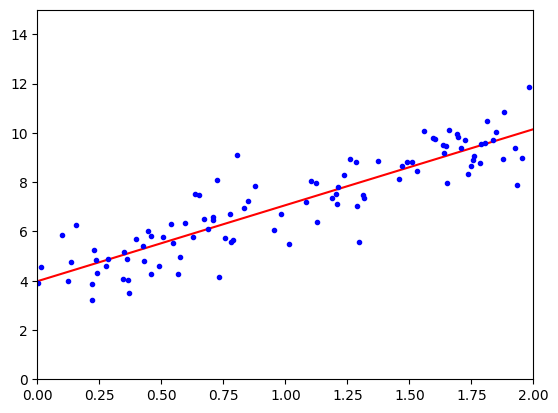

In [7]:
# Plotting model's predictions:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# Let's do the same using Scikit-Learn:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97967586]), array([[3.08444038]]))

In [9]:
# prediction:
lin_reg.predict(X_new)

array([[ 3.97967586],
       [10.14855662]])

In [10]:
# Lin.Reg. class is based on scipy.lingalg.lstsq() function - least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97967586],
       [3.08444038]])

In [12]:
# This function computes Normal Equation usnig the pseudoinverse of X - np.linalg.pinv()
# Using pseudoinverse - more efficient and handles edge cases nicely
np.linalg.pinv(X_b).dot(y)

array([[3.97967586],
       [3.08444038]])

In [ ]:
# Comp. Complexity:
# inverse of X_trans*X - (n+1)x(n+1) mastrix (n - number of features)
# inverting such matrix - O(n^2.4)-O(n^3): If you double the number of features, you multiply the computation time by:
# 2^2.4=5.3-2^3=8
# The computations gets very slow when the number of features grows large. But is linear with regards to the number of instances of the training set
# Predictions are very fast - linear growth w.r.t. to features

# For a large number of features another approach might be better -> Gradient descent